In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import norm
from scipy.stats import chi2_contingency


In [3]:
#read treatment1 data into dataframe
T5_no_diabetes =pd.read_excel('/Users/mehakrafiq/Library/CloudStorage/OneDrive-NationalUniversityofSciences&Technology/Desktop/upwork/MedicalStats/Treatment group 5.xlsx',sheet_name='No diabetes')
T5_pre_diabetes = pd.read_excel('/Users/mehakrafiq/Library/CloudStorage/OneDrive-NationalUniversityofSciences&Technology/Desktop/upwork/MedicalStats/Treatment group 5.xlsx',sheet_name='Pre-diabetes')
T5_diabetes = pd.read_excel('/Users/mehakrafiq/Library/CloudStorage/OneDrive-NationalUniversityofSciences&Technology/Desktop/upwork/MedicalStats/Treatment group 5.xlsx',sheet_name='Diabetes')

In [4]:
#make one datafrafme of all three dataframes
T5_no_diabetes['no_diabetes'] = 1
T5_no_diabetes['pre_diabetes'] = 0
T5_no_diabetes['diabetes'] = 0

T5_pre_diabetes['no_diabetes'] = 0
T5_pre_diabetes['pre_diabetes'] = 1
T5_pre_diabetes['diabetes'] = 0

T5_diabetes['no_diabetes'] = 0
T5_diabetes['pre_diabetes'] = 0
T5_diabetes['diabetes'] = 1

treatment_5 = pd.concat([T5_no_diabetes, T5_pre_diabetes, T5_diabetes], ignore_index=True)
treatment_5.head()


,No diabetes,Gender (M),Gender (F),Case number,Age,Length of stay,BMI,Fall,U69.*,T81.*,...,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,Pre-diabetes,Diabetes
0,1.0,0,1,1020297217,97,5,25.8,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN
1,1.0,0,1,1021069757,96,10,20.8,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
2,1.0,0,1,1021074803,96,9,21.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN
3,1.0,0,1,1020345191,96,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN
4,1.0,1,0,1021034940,96,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN


In [7]:
# Drop the extra columns
#treatment_5 = treatment_5.drop(columns=['No diabetes', 'Pre-diabetes', 'Diabetes'])

# Fill NaN values with 0 in specified columns
columns_to_fill = ['Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'R96.*', 'TOD', 'INTENSIV']
treatment_5[columns_to_fill] = treatment_5[columns_to_fill].fillna(0)

# Display the first few rows of the cleaned dataframe
treatment_5.head()


,Gender (M),Gender (F),Case number,Age,Length of stay,BMI,Fall,U69.*,T81.*,T84.*,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes
0,0,1,1020297217,97,5,25.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0
1,0,1,1021069757,96,10,20.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
2,0,1,1021074803,96,9,21.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,0,1,1020345191,96,8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,1,0,1021034940,96,6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [8]:
treatment_5.to_excel('treatment5.xlsx', index=False)


In [47]:
# Calculate descriptive statistics for each group
desc_stats = treatment_3.groupby(['no_diabetes', 'pre_diabetes', 'diabetes']).agg(
    mean_age=('Age', 'mean'),
    median_age=('Age', 'median'),
    std_age=('Age', 'std'),
    mean_length_of_stay=('Length of Stay', 'mean'),
    median_length_of_stay=('Length of Stay', 'median'),
    std_length_of_stay=('Length of Stay', 'std'),
    mean_BMI=('BMI', 'mean'),
    median_BMI=('BMI', 'median'),
    std_BMI=('BMI', 'std'),
)

# Display the descriptive statistics
desc_stats.reset_index()


,no_diabetes,pre_diabetes,diabetes,mean_age,median_age,std_age,mean_length_of_stay,median_length_of_stay,std_length_of_stay,mean_BMI,median_BMI,std_BMI
0,0,0,1,67.905109,72.0,15.265245,9.467153,7.0,6.950509,30.705102,29.40,13.041649
1,0,1,0,65.191781,67.0,16.916556,9.212329,7.0,8.642484,26.712371,25.60,5.508464
2,1,0,0,54.833333,56.0,20.259026,10.268018,7.0,9.473869,26.761301,25.65,6.031000


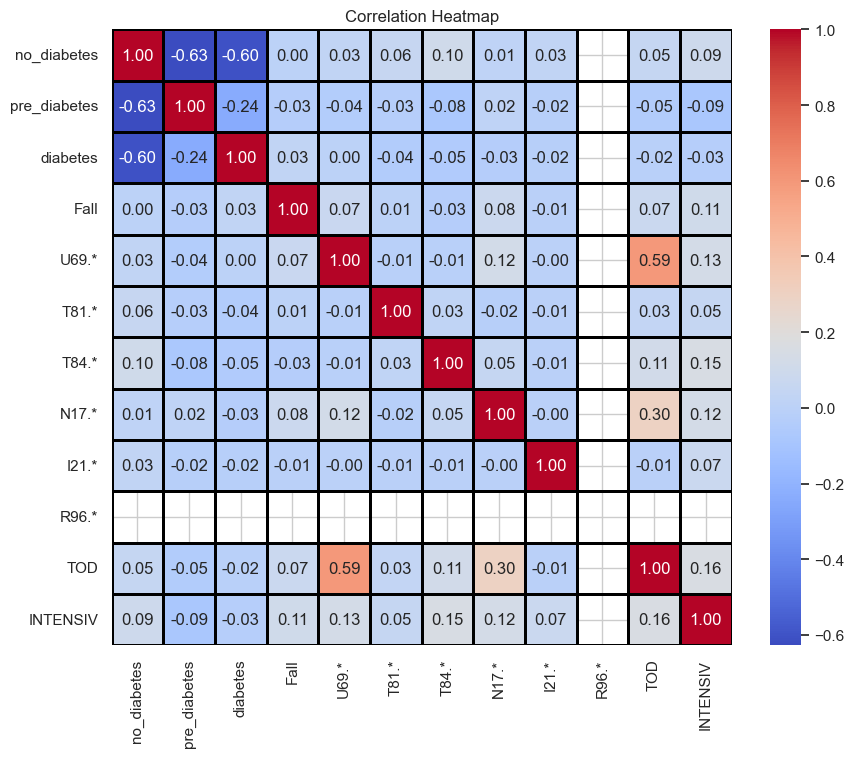

In [48]:
#heatmap of no_diabetes, pre_diabetes, diabetes with events 
# Select relevant columns
cols = ['no_diabetes', 'pre_diabetes', 'diabetes', 'Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'R96.*', 'TOD', 'INTENSIV']
correlation_matrix = treatment_3[cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')

# Set title and show plot
plt.title('Correlation Heatmap')
plt.show()

In [49]:
# Create a new column representing the conditions
condition_labels = ['No Diabetes']*treatment_3['no_diabetes'].sum() + \
                   ['Pre-Diabetes']*treatment_3['pre_diabetes'].sum() + \
                   ['Diabetes']*treatment_3['diabetes'].sum()
treatment_3['condition'] = condition_labels

# Define age groups and bins
age_groups = ['20-40', '40-60', '60+']
bins = [20, 40, 60, treatment_3['Age'].max()]
labels = age_groups
treatment_3['age_group'] = pd.cut(treatment_3['Age'], bins=bins, labels=labels, right=False)

In [50]:
# Function to perform chi-square tests and visualize the results
def chi_square_test(df, variable):
    # Create contingency tables for each condition
    contingency_no_diabetes = pd.crosstab(df[variable], df['no_diabetes'])
    contingency_pre_diabetes = pd.crosstab(df[variable], df['pre_diabetes'])
    contingency_diabetes = pd.crosstab(df[variable], df['diabetes'])
    
    # Perform chi-square tests
    chi2_no_diabetes, p_value_no_diabetes, _, _ = chi2_contingency(contingency_no_diabetes)
    chi2_pre_diabetes, p_value_pre_diabetes, _, _ = chi2_contingency(contingency_pre_diabetes)
    chi2_diabetes, p_value_diabetes, _, _ = chi2_contingency(contingency_diabetes)
    
    # Compile the chi-square results into a dataframe
    chi2_results = pd.DataFrame({
        'Condition': ['No Diabetes', 'Pre-Diabetes', 'Diabetes'],
        'Chi-square value': [chi2_no_diabetes, chi2_pre_diabetes, chi2_diabetes],
        'p-value': [p_value_no_diabetes, p_value_pre_diabetes, p_value_diabetes],
    })
    
    return chi2_results

In [51]:
#visualize the results

def visualize_chi_square_results(df, variable, chi2_results):
    sns.set(style='whitegrid')
    
    # Create a new column representing the conditions
    condition_labels = ['No Diabetes']*df['no_diabetes'].sum() + \
                       ['Pre-Diabetes']*df['pre_diabetes'].sum() + \
                       ['Diabetes']*df['diabetes'].sum()
    
    # Adding the new column to the dataframe
    df['condition'] = condition_labels
    
    # Creating a bar plot to visualize the proportion of individuals with the complication in each group
    plt.figure(figsize=(10, 6))
    sns.barplot(x='condition', y=variable, data=df, ci=None)
    
    # Adding labels and title to the plot
    plt.ylabel(f'Proportion of Individuals with "{variable}" Complication')
    plt.xlabel('Condition')
    plt.title(f'Proportion of Individuals Experiencing "{variable}" Complication by Condition')
    
    # Adding p-value asterisks
    # The y-coordinate for the p-value annotations is based on the maximum value in the variable column
    y_max = df.groupby('condition')[variable].mean().max() - 0.01
    
    # Annotate significant p-values with asterisks
    for i, p_value in enumerate(chi2_results['p-value']):
        if p_value < 0.05:
            plt.text(i, y_max, '*', ha='center', va='bottom', fontsize=20, color='red')
    
    # Display the plot
    plt.show()

# Usage example (replace 'YourDataFrame' with the name of your dataframe and 'YourVariable' with the variable of interest)
# visualize_chi_square_results(df=YourDataFrame, variable='YourVariable', chi2_results=chi_square_results)


In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#validate results with Tukey_hsd test
def tukey_hsd_posthoc_test(df, variable):
    # Create a new column 'group' to indicate the group of each row (no_diabetes, pre_diabetes, diabetes)
    df['group'] = df.apply(lambda x: 'no_diabetes' if x.no_diabetes else ('pre_diabetes' if x.pre_diabetes else 'diabetes'), axis=1)
    
    # Perform Tukey HSD post-hoc test
    posthoc = pairwise_tukeyhsd(endog=df[variable], groups=df['group'], alpha=0.05)
    
    # Print the summary of the Tukey HSD test
    print(posthoc)
    


In [63]:
# Testing for Fall in treatment_3
chi_square_results_Fall = chi_square_test(df=treatment_3, variable='Fall')
chi_square_results_Fall


,Condition,Chi-square value,p-value
0,No Diabetes,0.000000,1.000000
1,Pre-Diabetes,0.392241,0.531124
2,Diabetes,0.251606,0.615946


In [64]:
tukey_hsd_posthoc_test(df=treatment_3, variable='Fall')

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0106  0.846 -0.0555 0.0344  False
   diabetes pre_diabetes  -0.0237 0.5666 -0.0784  0.031  False
no_diabetes pre_diabetes  -0.0131 0.7618 -0.0571 0.0308  False
--------------------------------------------------------------


C:\Users\Mehak Rafiq\AppData\Local\Temp\ipykernel_11344\208515914.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='condition', y=variable, data=df, ci=None)


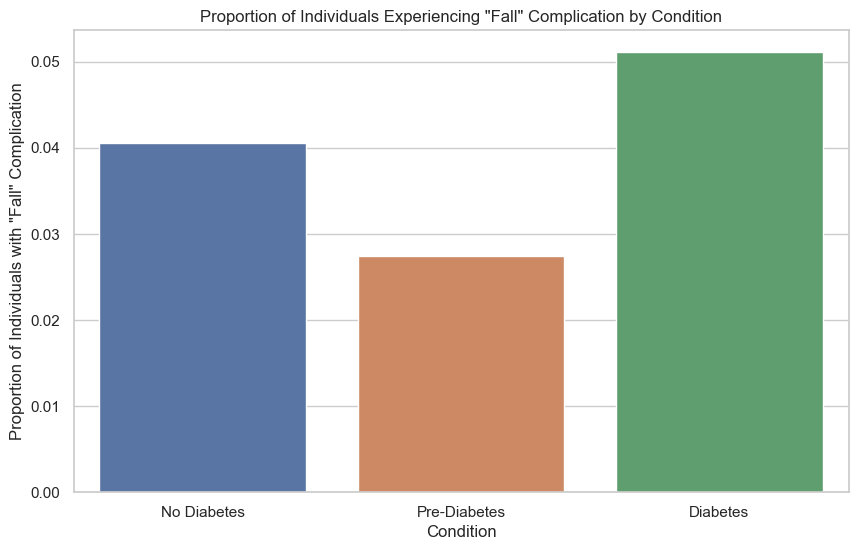

In [65]:
chi2_Fall = visualize_chi_square_results(df=treatment_3, variable='Fall', chi2_results=chi_square_results_Fall)

In [66]:
# Function to calculate relative risk and 95% confidence interval using statsmodels library
def calculate_relative_risk_with_statsmodels(contingency_table):
    results = []
    
    # Calculate relative risk and 95% CI for pre-diabetes vs no_diabetes
    table_pre_diabetes = Table2x2(contingency_table[:, :2])
    rr_pre_diabetes = table_pre_diabetes.riskratio
    ci_pre_diabetes = table_pre_diabetes.riskratio_confint()
    
    results.append({
        'Condition': 'Pre-Diabetes',
        'Relative Risk': rr_pre_diabetes,
        '95% CI Lower': ci_pre_diabetes[0],
        '95% CI Upper': ci_pre_diabetes[1],
    })
    
    # Calculate relative risk and 95% CI for diabetes vs no_diabetes
    table_diabetes = Table2x2(contingency_table[:, [0, 2]])
    rr_diabetes = table_diabetes.riskratio
    ci_diabetes = table_diabetes.riskratio_confint()
    
    results.append({
        'Condition': 'Diabetes',
        'Relative Risk': rr_diabetes,
        '95% CI Lower': ci_diabetes[0],
        '95% CI Upper': ci_diabetes[1],
    })
    
    return pd.DataFrame(results)

In [67]:
# Adjust the function to add a small constant to the contingency table to avoid cells with zero expected frequency
def calculate_p_value(contingency_table):
    contingency_table += 0.5  # Adding a small constant to avoid zero expected frequency issue
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

In [ ]:
# Function to calculate relative risks with age stratification
def calculate_relative_risks_age_stratification(df, variable, age_groups):
    # Create a new column indicating whether the variable of interest is above the median
    median_value = df[variable].median()
    df[f'{variable}_High'] = (df[variable] > median_value).astype(int)
    
    # Recreate contingency tables for each age group, calculate relative risks, and calculate p-values
    rr_results_statsmodels = []

    for age_group in age_groups:
        # Create a contingency table for the age group
        contingency_table = pd.crosstab(df[df['age_group'] == age_group][f'{variable}_High'], 
                                        df[df['age_group'] == age_group]['condition'])
        
        # Ensure the contingency table has rows for both outcomes (0 and 1) for each condition
        for condition in ['no_diabetes', 'pre_diabetes', 'diabetes']:
            if not ((contingency_table.columns == condition).any() and (contingency_table.index == 0).any()):
                contingency_table.loc[0, condition] = 0
            if not ((contingency_table.columns == condition).any() and (contingency_table.index == 1).any()):
                contingency_table.loc[1, condition] = 0
        
        # Sort the index to have a proper contingency table structure
        contingency_table.sort_index(inplace=True)
        
        # Calculate relative risk and confidence intervals with statsmodels
        rr_df = calculate_relative_risk_with_statsmodels(contingency_table.values)
        rr_df['Age Group'] = age_group
        
        # Calculate p-values and add to the dataframe
        rr_df['p-value'] = rr_df.apply(lambda row: calculate_p_value(contingency_table.iloc[:, :2].values) if row['Condition'] == 'Pre-Diabetes' 
                                       else calculate_p_value(contingency_table.iloc[:, [0, 2]].values), axis=1)
        
        rr_results_statsmodels.append(rr_df)

    # Combine the results from all age groups into a single dataframe
    rr_results_statsmodels_df = pd.concat(rr_results_statsmodels, axis=0).reset_index(drop=True)
    return rr_results_statsmodels_df

# Checking the function
print("Function defined successfully.")
